In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA # 导入 PCA
import matplotlib.pyplot as plt # 导入 matplotlib 用于绘图
import numpy as np # 导入 numpy 用于数据处理

In [2]:
# 1. 加载鸢尾花数据集
data = load_iris()
X = data.data       # 特征数据
y_true = data.target # 真实标签（这里用于可视化，以便对比降维效果）
feature_names = data.feature_names
target_names = data.target_names

In [3]:
# 2. 使用 PCA 将数据降维到 2 维
# n_components=2 表示我们希望将数据降到 2 个主成分
# random_state=42 用于确保结果的可复现性
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X) # 对原始数据进行降维

In [4]:
# 打印降维后的数据形状
print(f"原始数据形状: {X.shape}")
print(f"PCA 降维后数据形状: {X_pca.shape}")
print("-" * 50)

原始数据形状: (150, 4)
PCA 降维后数据形状: (150, 2)
--------------------------------------------------


In [5]:
# 打印 PCA 解释的方差比例
print("每个主成分解释的方差比例:")
print(pca.explained_variance_ratio_)
print(f"前两个主成分累计解释的方差比例: {np.sum(pca.explained_variance_ratio_):.2f}")
print("-" * 50)

每个主成分解释的方差比例:
[0.92461872 0.05306648]
前两个主成分累计解释的方差比例: 0.98
--------------------------------------------------


In [6]:
# 3. 可视化降维后的数据
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

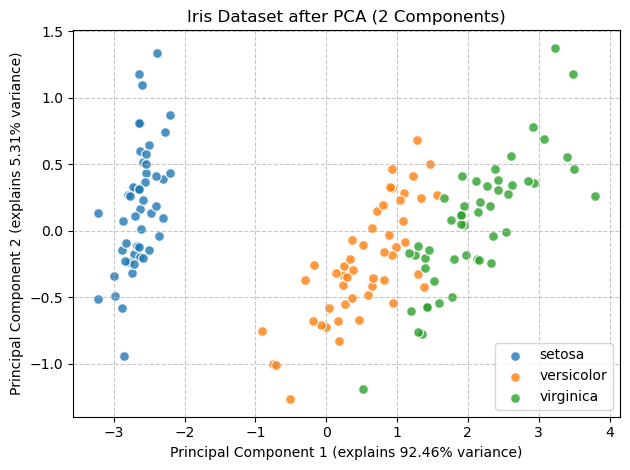

In [7]:
# 遍历每个真实的鸢尾花类别，并绘制其数据点
for i, target_name in enumerate(target_names):
    # 找到属于当前类别的数据点的索引
    indices = y_true == i
    # 绘制这些数据点在二维 PCA 空间中的位置
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1],
                label=target_name, # 设置图例标签为类别名称
                alpha=0.8,         # 设置透明度
                edgecolor='w',     # 设置点边框颜色
                s=50)              # 设置点大小

# 添加图例和标签
plt.title('Iris Dataset after PCA (2 Components)')
plt.xlabel('Principal Component 1 (explains {:.2f}% variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Principal Component 2 (explains {:.2f}% variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.legend() # 显示图例
plt.grid(True, linestyle='--', alpha=0.7) # 添加网格线
plt.tight_layout() # 调整布局，防止标签重叠
plt.show()